Welcome to the notebook. This notebook is just a Figure Creator. Nothing special. 

The magic line of code is `plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")`, which actulaly generates the image. Unfortunately we have some somewhat complicated images to make, so let's hop to it.

First, how about a lambertian/specular demonstration? As a bit of an example.

In [1]:
#Imports. BE SURE TO RUN THIS CELL!

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import matplotlib.animation as animation
import random
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
import matplotlib as mpl
import scipy.misc
from scipy import ndimage
import mpl_interactions.ipyplot as iplt

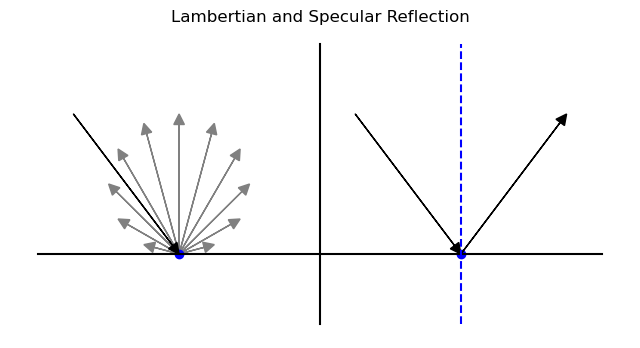

In [18]:

floor1 = np.array([0,8])
floor2 = np.array([1,1])
divide1 = np.array([4,4])
divide2 = np.array([0,4])

fig, ax = plt.subplots(figsize = (8,4))

ax.plot(floor1,floor2,divide1,divide2,color='k')
ax.scatter([2,6],[1,1],color='blue')

#draw the main arrows.
ax.arrow(0.5,3,1.5,-2,head_width=0.15,head_length=0.15,length_includes_head=True, color='k',zorder=1)
ax.arrow(4.5,3,1.5,-2,head_width=0.15,head_length=0.15,length_includes_head=True, color='k',zorder=1)
ax.arrow(6,1,1.5,2,head_width=0.15,head_length=0.15,length_includes_head=True, color='k',zorder=1)

#reflection line for specular
ax.plot([6,6],[0,4],linestyle='dashed',color="blue")

#now the harder part: the lambertian arrows. 
#for some reason ax can't do this, there is no ax.circle function. So instead we have to create an artist 
#and patch it in.
#circle = plt.Circle((2,2),1,color='r',zorder=0)
#ax.add_patch(circle)
#Circle removed as it was cluttery, but it was a good guide for making the arrows.

#This should be able to be done algorithmically: adjust the dx and dy values for arrow
#have it sweep across the angles and fill the circle. 
radc = 0.0174533 #for conversion into radians when needed.
theta = 15.0 #Think in degrees, calculate in radians.
while (theta < 90):
    L = 1.0 * (np.sin((180. - 2.*theta)*radc) / np.sin(theta*radc))
    dx = L*np.cos((90.-theta)*radc)
    dy = L*np.sin((90.-theta)*radc)
    ax.arrow(2,1,dx,dy,head_width=0.15,head_length=0.15,length_includes_head=True, color='gray',zorder=0)
    ax.arrow(2,1,-dx,dy,head_width=0.15,head_length=0.15,length_includes_head=True, color='gray',zorder=0)
    theta = theta + 15.
#The 90 degree case still needs to be handled.
ax.arrow(2,1,0,2,head_width=0.15,head_length=0.15,length_includes_head=True, color='gray',zorder=0)


ax.axis('off') #remove border and ticks. 
ax.set(title = "Lambertian and Specular Reflection")

#The save-as-pdf function.
plt.savefig("LambertSpec.pdf", format="pdf")

plt.show()


Up next: a diagram showcasing a scattering event in SRTC++ with Lambertian Reflection.

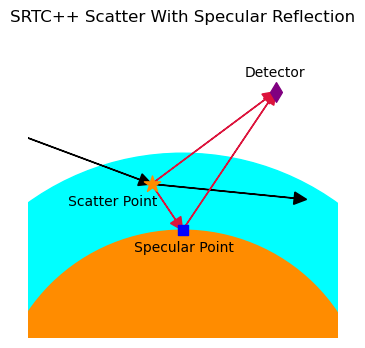

In [19]:

fig, ax = plt.subplots(figsize = (4,4))

#First, we need to create Titan and Titan's Atmosphere.
#This will involve circles. 
atmo = plt.Circle((0.5,-0.25),0.85,color="cyan")
titan = plt.Circle((0.5,-0.25),0.6,color="darkorange")
ax.add_patch(atmo)
ax.add_patch(titan)

#While it doesn't make logical sense to add the arrows first, we need them under the points
#So deal with it.
ax.arrow(0,0.65,0.4,-0.15,head_width=0.04,head_length=0.04,length_includes_head=True, color='k')
ax.arrow(0.4,0.5,0.1,-0.15,head_width=0.04,head_length=0.04,length_includes_head=True, color='crimson')
ax.arrow(0.4,0.5,0.4,0.3,head_width=0.04,head_length=0.04,length_includes_head=True, color='crimson')
ax.arrow(0.4,0.5,0.5,-.05,head_width=0.04,head_length=0.04,length_includes_head=True, color='k')
ax.arrow(0.5,0.35,0.3,0.45,head_width=0.04,head_length=0.04,length_includes_head=True, color='crimson')

#add various points we need: specular point, scatter point, and detector.
ax.scatter(0.5,0.35,marker="s",color="blue",s=50)
ax.scatter(0.4,0.5,marker="*", color="darkorange",s=150)
ax.scatter(0.8,0.8,marker="d",color="purple",s=100)

#Now some labels might be helpful
ax.text(0.3,0.28, "   Specular Point")
ax.text(0.09,0.43, "   Scatter Point")
ax.text(0.7,0.85, "Detector")

ax.axis('off') #remove border and ticks. 
ax.set(title = "SRTC++ Scatter With Specular Reflection") 
ax.set_ylim([0,1])
ax.set_xlim([0,1])


#The save-as-pdf function.
plt.savefig("SRTCSpec.pdf", format="pdf")

plt.show()

Figure 3 involves processing a VIMS image, so the code below is gonna be rather long. Whoo!



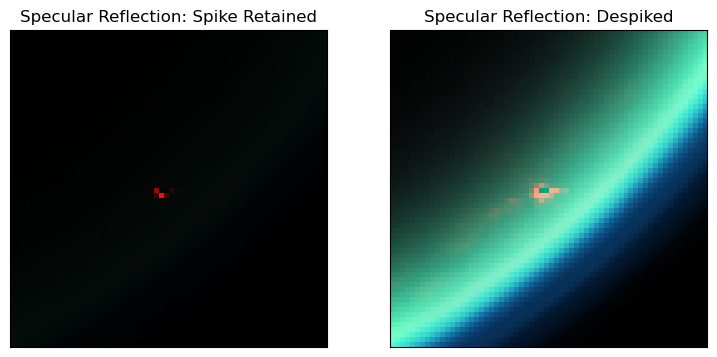

In [20]:
specular = r"C:\Users\deran\Desktop\CubeCSVDatabase\T85\CM_1721848119_1.cub.csv" #Specular Point

#File insertion goes here.
#Make sure to put the entire file path here. 
#You do not need to specify the axes file, it can be found automatically from this one.

filepath = specular #use the name of the cube you want in the above cell.

#Now we extract the axes file as well...

axesfp = filepath.removesuffix(".csv") + ".axes.csv"

# Skeleton code nabbed from https://realpython.com/python-csv/

#Step 1: use the axes to determine the size of what we're dealing with.

xAxis = []
yAxis = []
zAxis = []

with open(axesfp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        i = 0
        L = len(row)
        while (i < L-1):
            if (line_count == 0):
                xAxis.append(row[i])
            elif (line_count == 1):
                yAxis.append(row[i])
            elif (line_count == 2):
                zAxis.append(row[i])
            i = i+1
        line_count += 1

#We now have an x, y, and z axis. x and y axes are just ordinal, but the z axis contains wavelength in microns.
#The lengths of these arrays tell us how to extract the data.

dataStorage = [[[0 for x in range(len(zAxis))] for x in range(len(yAxis))] for x in range(len(xAxis))] 
dataStorage2 = [[[0 for x in range(len(zAxis))] for x in range(len(yAxis))] for x in range(len(xAxis))] 

#The above holds the data of the cube itself. 

with open(filepath) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < len(xAxis)):
            dataStorage[i][j][k] = float(row[i])
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage[i][j][k])):
                dataStorage[i][j][k] = 0 #We set nans to zero to allow plotting to take place, careful!
                dataStorage2[i][j][k] = 0
            elif (dataStorage[i][j][k] < 0):
                dataStorage[i][j][k] = 0 #Negative values are nonsense.
                dataStorage2[i][j][k] = 0
            elif (dataStorage[i][j][k] > 1):
                dataStorage[i][j][k] = 1 #Make saturation obvious? Keep it from overloading. 
            i = i + 1
        i = 0
        j = j + 1
        if (j >= len(yAxis)):
            j = 0
            k = k + 1
        line_count += 1

#The data is now read in.
#all future programs in this notebook should be able to access xAxis, yAxis, zAxis and dataStorage.
#dataStorage is stored in xyz order, that is x, y, and wavelength. 

#helpful declarations
#Wavelength of windows in microns (um)
windowum = [0.933078, 1.08183, 1.27813, 1.59018, 2.01781, 2.69620, 2.79889, 5.00576]
#Now we need to dynamically find the indeces where this is true. 
windowInd = [0,0,0,0,0,0,0,0]
i = 0
while (i < 8):
    j = 0
    while (j < len(zAxis)):
        if (float(zAxis[j]) < windowum[i] and float(zAxis[j+1]) > windowum[i]):
            if (windowum[i] - float(zAxis[j]) < float(zAxis[j+1]) - windowum[i]):
                windowInd[i] = j
                #Have to make sure we pick the closest point, not just the "lower" one.
            else:
                windowInd[i] = j+1
            j = len(zAxis)
        j = j + 1
    i = i+1
    
def indexFromWav(wav):
    index = 0
    j = 0
    while (j < len(zAxis)):
        if (float(zAxis[j]) < wav and float(zAxis[j+1]) > wav):
            if (wav - float(zAxis[j]) < float(zAxis[j+1]) - wav):
                index = j
                #Have to make sure we pick the closest point, not just the "lower" one.
            else:
                index = j+1
            j = len(zAxis)
        j = j + 1    
    return index
    
#image dimensions are fungible. Calculate them.  
xDim = 0
yDim = 0
if (len(xAxis) > len(yAxis)):
    yDim = 9 
    xDim = 9/(len(xAxis)/len(yAxis))
else:
    xDim = 9
    yDim = 9/(len(yAxis)/len(xAxis))
#This may seem backward, but transpositions occur so...

fig, ax = plt.subplots(1,2,figsize = (9,4.5)) 
temp = np.transpose(dataStorage)
temp2 = np.transpose(dataStorage2)

# set R, G, and B
R = temp[indexFromWav(5.)]
G = temp[indexFromWav(2.)]
B = temp[indexFromWav(1.3)]
R2 = temp2[indexFromWav(5.)]
G2 = temp2[indexFromWav(2.)]
B2 = temp2[indexFromWav(1.3)]

# Now we need to combine them in the correct form: xyc, that is, x, y, then color value. 
#R = np.transpose(R)
#G = np.transpose(G)
#B = np.transpose(B) # switches xy to yx.
colorData = [R,G,B] # arranged in cyx
colorData2 = [R2,G2,B2]
colorData = np.transpose(colorData) #arranged in xyc
colorData2 = np.transpose(colorData2) #arranged in xyc

#Now we need to normalize the colors.
maximum =  np.amax(colorData)
colorData = colorData / maximum #Sets maximum to 1 for RGB. As it should.
maximum =  np.amax(colorData2)
colorData2 = colorData2 / maximum #Sets maximum to 1 for RGB. As it should.
#print(colorData)

image = ax[1].imshow(colorData, origin="lower")
ax[1].set(xticks=[], yticks=[], title = 'Specular Reflection: Despiked') 
image = ax[0].imshow(colorData2, origin="lower")
ax[0].set(xticks=[], yticks=[], title = 'Specular Reflection: Spike Retained') 

plt.savefig("SpecSpikeNoSpike.pdf", format="pdf")

plt.show()

Now we need to make some plots of transmission and reflection coefficients. We are primarily interested in reflection and its relation to incidence angle and index of refraction. Minor problem is that polarization matters, so we're gonna have to take the average of two results. To this end we grab the Fresnel Coefficients/Equations/whatever from wikipedia since they are a well known result. As the index of refraction of air is nearly 1, we use the reduced forms:

$$ R_s = \left| \frac{cos\theta_i - n_2 cos\theta_t}{cos\theta_i + n_2cos\theta_t} \right|^2 $$
$$ R_p = \left| \frac{cos\theta_t - n_2 cos\theta_i}{cos\theta_t + n_2cos\theta_i} \right|^2 $$

We can calculate the tarnsmission angle from snell's law, $\theta_t = asin \left( \frac{sin\theta_i}{n_2} \right)$. This is defined for all values of incidence so long as the index of refraction is greater than 1, which it always will be. And, naturally, T = 1-R in both cases. If we want to consider the average, we simply add the perp and paralell polarizations together and then divide by 2 to get the average. 

Anyway, this is sufficient information to make a plot of reflection coefficient versus incidence angle. 

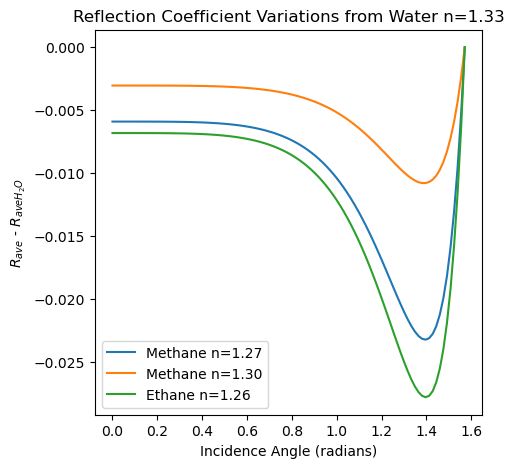

In [58]:
size = 100 #how many points do you want sampled here?
indexMet1 = 1.27 #at "0" frequency and 111 K. 
indexMet2 = 1.30 #at 90 K and 3.57 microns
indexEth = 1.26 # https://ogst.ifpenergiesnouvelles.fr/articles/ogst/full_html/2020/01/ogst190096/ogst190096.html
indexWat = 1.33 #At 20 Celsius normal pressure.

incidentRads = [0 for x in range(size)]
reflectLineMet1 = [0 for x in range(size)]
reflectLineMet2 = [0 for x in range(size)]
reflectLineEth = [0 for x in range(size)]
reflectLineWat = [0 for x in range(size)]


def getAveReflection(incidence, indexR):
    #Take in incidence angle in radians and an index of refraction, spit out the average reflection coefficient.
    transmit = np.arcsin( (np.sin(incidence))/(indexR) )
    refS = ((np.cos(incidence) - indexR * np.cos(transmit))/(np.cos(incidence) + indexR * np.cos(transmit)))**2
    refP = ((np.cos(transmit) - indexR * np.cos(incidence))/(np.cos(transmit) + indexR * np.cos(incidence)))**2
    R = (refS + refP)/2.
    return R

#Get the radians divided equally from 0 to pi/2. 
i = 0
for item in incidentRads:
    incidentRads[i] = (np.pi / 2.)*(i/(size-1))
    #most assuredly a more efficient way to do this, but this is obvious what it's doing.
    #While we're here, also set the reflection coefficients, no need to set the loop up twice. 
    reflectLineMet1[i] = getAveReflection(incidentRads[i],indexMet1)
    reflectLineMet2[i] = getAveReflection(incidentRads[i],indexMet2)
    reflectLineEth[i] = getAveReflection(incidentRads[i],indexEth)
    reflectLineWat[i] = getAveReflection(incidentRads[i],indexWat)
    i = i+1
    

fig, ax = plt.subplots(figsize = (5,5)) 
ax.plot(incidentRads,np.array(reflectLineMet1)-np.array(reflectLineWat), label="Methane n=1.27")
ax.plot(incidentRads,np.array(reflectLineMet2)-np.array(reflectLineWat), label="Methane n=1.30")
ax.plot(incidentRads,np.array(reflectLineEth)-np.array(reflectLineWat), label="Ethane n=1.26")
ax.legend()
ax.set(xlabel = "Incidence Angle (radians)", ylabel = "$R_{ave}$ - $R_{aveH_2O}$", title = "Reflection Coefficient Variations from Water n=1.33")
#ax.scatter(incidentRads,reflectLineWat)

plt.savefig("ReflectionVariations.pdf", format="pdf", bbox_inches='tight') #Tight keeps a label from being cut off. 

plt.show()

Up next we have the arrangement of detectors in the simulation. What fun!

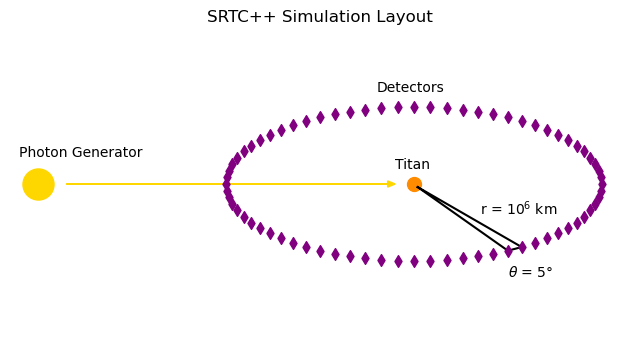

In [132]:
fig, ax = plt.subplots(figsize = (8,4)) 
ax.scatter(0,0,color="darkorange", s=100,zorder=0) #Titan at the origin for mathematical easiness
ax.scatter(-2,0,color="gold",s=500) #Place the sun somewhere.

#First, find the position of all points if we were plotting the detectors in a circle. 

detectx = [0 for x in range(72)]
detecty = [0 for x in range(72)]
i = 0
for angle in detectx:
    detectx[i] = np.cos( (i / 72.) *2.*np.pi )
    detecty[i] = np.sin( (i / 72.) *2.*np.pi )
    i=i+1

ax.scatter(detectx,np.array(detecty)*.5, color="purple", marker = 'd')

ax.plot((0.02,detectx[60],detectx[61],0.02),(-0.02,detecty[60]*.5,detecty[61]*.5,-0.02),zorder=0,color='k') #make sure to draw correctly.

ax.text(-2.1,.18, "Photon Generator")
ax.text(-.1,.1, "Titan")
ax.text(-.2,.6, "Detectors")
ax.text(0.35,-.2, "r = $10^6$ km")
ax.text(0.5,-.6, r"$\theta$ = 5$\degree$")

ax.arrow(-1.85,0,1.75,0,color="gold",head_width=0.04,head_length=0.04,length_includes_head=True,zorder=0)

ax.set(ylim = [-1,1], xticks = [], yticks = [], title="SRTC++ Simulation Layout")
ax.axis('off') #remove border and ticks. 

plt.savefig("SRTCLayout.pdf", format="pdf", bbox_inches='tight')

plt.show()

Up next is the arrangement of images for the specular simulation, including the animation. Hoo boy, that's gonna be a fun one. Will need both an animation and a non-animation.

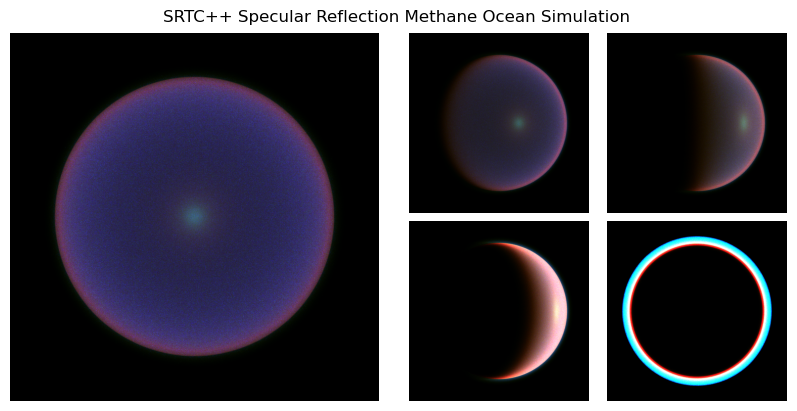

In [6]:
fig = plt.figure(figsize = (8,4), layout="constrained")
fig.suptitle('SRTC++ Specular Reflection Methane Ocean Simulation')
figL, figR = fig.subfigures(1,2,width_ratios=[1,1])
axL = figL.subplots()
axR = figR.subplots(2,2)

img1=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim000.tif")
img2=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim035.tif")
img3=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim090.tif")
img4=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim120.tif")
img5=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim180.tif")

axL.imshow(ndimage.rotate(img1,90))
axR[0][0].imshow(ndimage.rotate(img2,90))
axR[0][1].imshow(ndimage.rotate(img3,90))
axR[1][0].imshow(ndimage.rotate(img4,90))
axR[1][1].imshow(ndimage.rotate(img5,90))

axL.axis('off') #remove border and ticks. 
axR[0][0].axis('off')
axR[0][1].axis('off')
axR[1][0].axis('off')
axR[1][1].axis('off')

plt.savefig("SpecularSim.pdf", format="pdf", bbox_inches='tight')

plt.show()

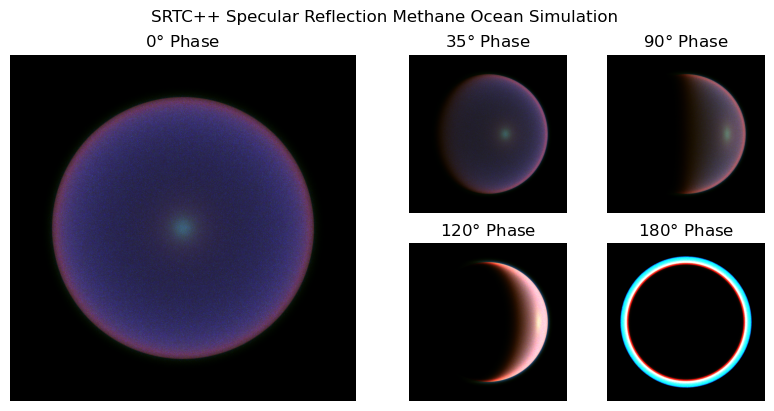

In [9]:
fig = plt.figure(figsize = (8,4), layout="constrained")
fig.suptitle('SRTC++ Specular Reflection Methane Ocean Simulation')
figL, figR = fig.subfigures(1,2,width_ratios=[1,1])
axL = figL.subplots()
axR = figR.subplots(2,2)

img1=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim000.tif")
img2=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim035.tif")
img3=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim090.tif")
img4=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim120.tif")
img5=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim180.tif")

axL.imshow(ndimage.rotate(img1,90))
axR[0][0].imshow(ndimage.rotate(img2,90))
axR[0][1].imshow(ndimage.rotate(img3,90))
axR[1][0].imshow(ndimage.rotate(img4,90))
axR[1][1].imshow(ndimage.rotate(img5,90))

axL.set_title("0$\degree$ Phase")
axR[0][0].set_title("35$\degree$ Phase")
axR[0][1].set_title("90$\degree$ Phase")
axR[1][0].set_title("120$\degree$ Phase")
axR[1][1].set_title("180$\degree$ Phase")

axL.axis('off') #remove border and ticks. 
axR[0][0].axis('off')
axR[0][1].axis('off')
axR[1][0].axis('off')
axR[1][1].axis('off')

plt.savefig("SpecularSimTitled.pdf", format="pdf", bbox_inches='tight')

plt.show()

And now the animating version.

<IPython.core.display.Javascript object>


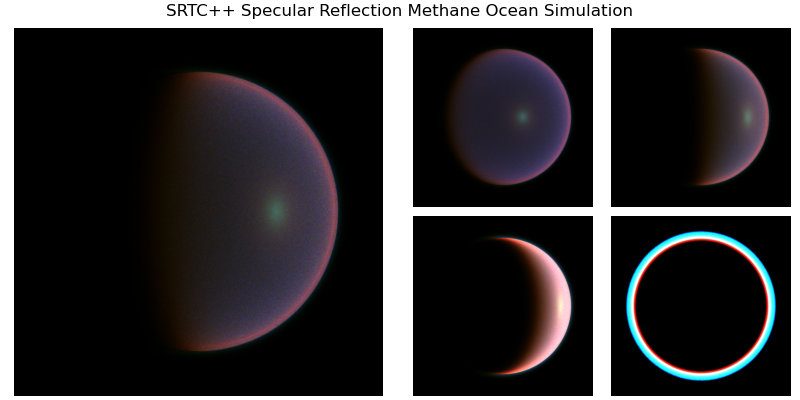

In [12]:
%matplotlib notebook

fig = plt.figure(figsize = (8,4), layout="constrained")
fig.suptitle('SRTC++ Specular Reflection Methane Ocean Simulation')
figL, figR = fig.subfigures(1,2,width_ratios=[1,1])
axL = figL.subplots()
axR = figR.subplots(2,2)

stringA = r"""C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim"""
stringB = r""".tif"""

#Since the data goes up like a pattern 000 005 010 one could just make an algorithm
#to automatically go from one to another... but string magic is annoying. It'll be
#much easier just to create an array.
degOrder = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045",
          "050", "055", "060", "065", "070", "075", "080", "085", "090", "095",
          "100", "105", "110", "115", "120", "125", "130", "135", "140", "145",
          "150", "155", "160", "165", "170", "175", "180", "185", "190", "195",
          "200", "205", "210", "215", "220", "225", "230", "235", "240", "245",
          "250", "255", "260", "265", "270", "275", "280", "285", "290", "295",
          "300", "305", "310", "315", "320", "325", "330", "335", "340", "345",
          "350", "355"]

img1=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim000.tif")
img2=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim035.tif")
img3=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim090.tif")
img4=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim120.tif")
img5=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\SpecularTC2\SpecSim180.tif")

vid = axL.imshow(ndimage.rotate(img1,90))
axR[0][0].imshow(ndimage.rotate(img2,90))
axR[0][1].imshow(ndimage.rotate(img3,90))
axR[1][0].imshow(ndimage.rotate(img4,90))
axR[1][1].imshow(ndimage.rotate(img5,90))

axL.axis('off') #remove border and ticks. 
axR[0][0].axis('off')
axR[0][1].axis('off')
axR[1][0].axis('off')
axR[1][1].axis('off')

def update(frame):
    axL.clear()
    filename = stringA + degOrder[frame] + stringB
    img1 = mpimg.imread(filename)
    vid = axL.imshow(ndimage.rotate(img1,90))
    axL.axis('off')
    
ani = animation.FuncAnimation(fig, update, frames=len(degOrder), interval=100)

#Saving the animation can take a while, disable as needed.
#writer = animation.FFMpegFileWriter(fps = 4)
#ani.save('SpecularSimMOVIE.mp4', writer = writer)

plt.show()

Now we need the same plots as above, but for the lambertian simulation. 

<IPython.core.display.Javascript object>


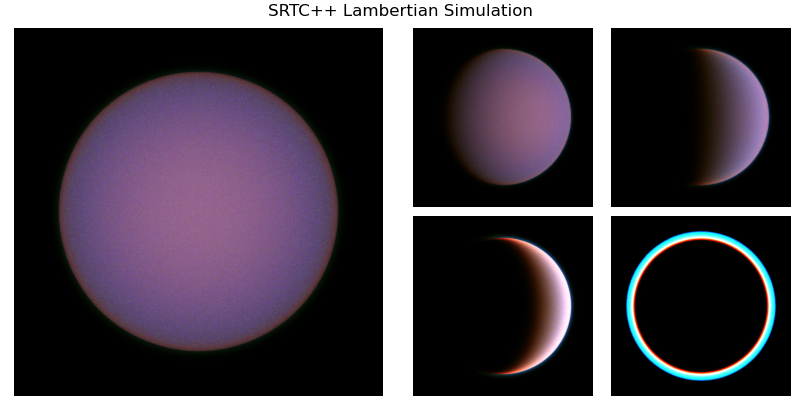

In [13]:
fig = plt.figure(figsize = (8,4), layout="constrained")
fig.suptitle('SRTC++ Lambertian Simulation')
figL, figR = fig.subfigures(1,2,width_ratios=[1,1])
axL = figL.subplots()
axR = figR.subplots(2,2)

img1=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim000.tif")
img2=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim035.tif")
img3=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim090.tif")
img4=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim120.tif")
img5=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim180.tif")

axL.imshow(ndimage.rotate(img1,90))
axR[0][0].imshow(ndimage.rotate(img2,90))
axR[0][1].imshow(ndimage.rotate(img3,90))
axR[1][0].imshow(ndimage.rotate(img4,90))
axR[1][1].imshow(ndimage.rotate(img5,90))

axL.axis('off') #remove border and ticks. 
axR[0][0].axis('off')
axR[0][1].axis('off')
axR[1][0].axis('off')
axR[1][1].axis('off')

plt.savefig("LambertianSim.pdf", format="pdf", bbox_inches='tight')

plt.show()

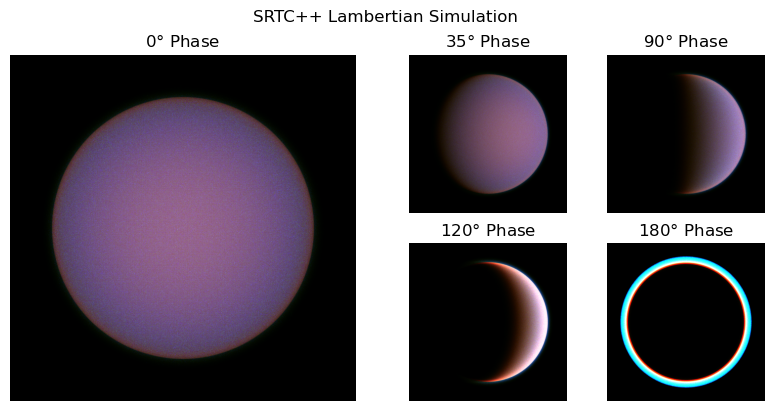

In [10]:
fig = plt.figure(figsize = (8,4), layout="constrained")
fig.suptitle('SRTC++ Lambertian Simulation')
figL, figR = fig.subfigures(1,2,width_ratios=[1,1])
axL = figL.subplots()
axR = figR.subplots(2,2)

img1=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim000.tif")
img2=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim035.tif")
img3=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim090.tif")
img4=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim120.tif")
img5=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim180.tif")

axL.imshow(ndimage.rotate(img1,90))
axR[0][0].imshow(ndimage.rotate(img2,90))
axR[0][1].imshow(ndimage.rotate(img3,90))
axR[1][0].imshow(ndimage.rotate(img4,90))
axR[1][1].imshow(ndimage.rotate(img5,90))

axL.set_title("0$\degree$ Phase")
axR[0][0].set_title("35$\degree$ Phase")
axR[0][1].set_title("90$\degree$ Phase")
axR[1][0].set_title("120$\degree$ Phase")
axR[1][1].set_title("180$\degree$ Phase")

axL.axis('off') #remove border and ticks. 
axR[0][0].axis('off')
axR[0][1].axis('off')
axR[1][0].axis('off')
axR[1][1].axis('off')

plt.savefig("LambertianSimTitled.pdf", format="pdf", bbox_inches='tight')

plt.show()

Aaaaand animate it!

<IPython.core.display.Javascript object>


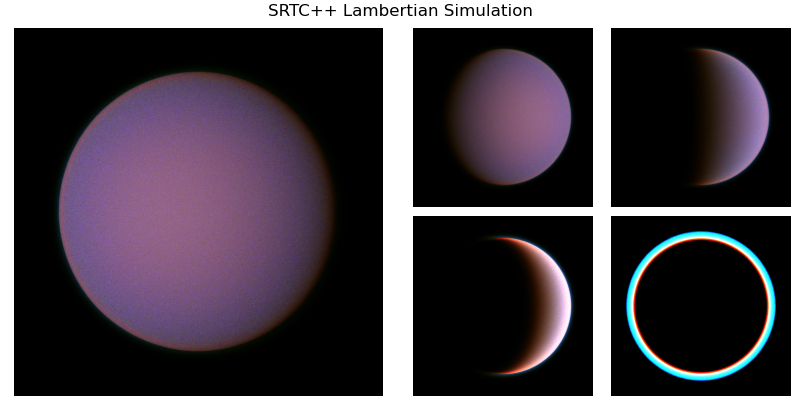

In [14]:
%matplotlib notebook

fig = plt.figure(figsize = (8,4), layout="constrained")
fig.suptitle('SRTC++ Lambertian Simulation')
figL, figR = fig.subfigures(1,2,width_ratios=[1,1])
axL = figL.subplots()
axR = figR.subplots(2,2)

stringA = r"""C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim"""
stringB = r""".tif"""

#Since the data goes up like a pattern 000 005 010 one could just make an algorithm
#to automatically go from one to another... but string magic is annoying. It'll be
#much easier just to create an array.
degOrder = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045",
          "050", "055", "060", "065", "070", "075", "080", "085", "090", "095",
          "100", "105", "110", "115", "120", "125", "130", "135", "140", "145",
          "150", "155", "160", "165", "170", "175", "180", "185", "190", "195",
          "200", "205", "210", "215", "220", "225", "230", "235", "240", "245",
          "250", "255", "260", "265", "270", "275", "280", "285", "290", "295",
          "300", "305", "310", "315", "320", "325", "330", "335", "340", "345",
          "350", "355"]

img1=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim000.tif")
img2=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim035.tif")
img3=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim090.tif")
img4=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim120.tif")
img5=mpimg.imread(r"C:\Users\deran\Desktop\AnimationFiles\LambTC2\LambSim180.tif")

vid = axL.imshow(ndimage.rotate(img1,90))
axR[0][0].imshow(ndimage.rotate(img2,90))
axR[0][1].imshow(ndimage.rotate(img3,90))
axR[1][0].imshow(ndimage.rotate(img4,90))
axR[1][1].imshow(ndimage.rotate(img5,90))

axL.axis('off') #remove border and ticks. 
axR[0][0].axis('off')
axR[0][1].axis('off')
axR[1][0].axis('off')
axR[1][1].axis('off')

def update(frame):
    axL.clear()
    filename = stringA + degOrder[frame] + stringB
    img1 = mpimg.imread(filename)
    vid = axL.imshow(ndimage.rotate(img1,90))
    axL.axis('off')
    
ani = animation.FuncAnimation(fig, update, frames=len(degOrder), interval=100)

#Saving the animation can take a while, disable as needed.
writer = animation.FFMpegFileWriter(fps = 4)
ani.save('LambertianSimMOVIE.mp4', writer = writer)

plt.show()

Need to examine all eight wavelength features and intensities. This will be two figures, no need for color. Ingest the raw data and print it.

In [22]:
degOrder = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045",
          "050", "055", "060", "065", "070", "075", "080", "085", "090", "095",
          "100", "105", "110", "115", "120", "125", "130", "135", "140", "145",
          "150", "155", "160", "165", "170", "175", "180", "185", "190", "195",
          "200", "205", "210", "215", "220", "225", "230", "235", "240", "245",
          "250", "255", "260", "265", "270", "275", "280", "285", "290", "295",
          "300", "305", "310", "315", "320", "325", "330", "335", "340", "345",
          "350", "355"]
windowum = ["0.93", "1.08", "1.27", "1.59", "2.01", "2.69", "2.79", "5.00"]

#Set the initial filepath
fpbeg = r"C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w"
#Just point to the directory that contains all the csv files. Everything else should be findable from there.
#Below are the other strings we need to keep everything modular. 
fpmid = r"_p"
fpend = r".colorCCD.Jcube.csv"
#In the middle will be two different numbers, one for wavelength and one for angle.
#We need arrays with the values we will be using.
#All stored as strings rather than numbers to make file operations simpler. At least in my head.

filepath = fpbeg + windowum[0] + fpmid + degOrder[18] + fpend
axesfp = filepath.removesuffix(".csv") + ".axes.csv"
xAxis = []
yAxis = []
zAxis = []

#Read the Data. 
#Start by reading in the dimensions of just one image, so we can set everything else later.
with open(axesfp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        i = 0
        L = len(row)
        while (i < L-1):
            if (line_count == 0):
                xAxis.append(row[i])
            elif (line_count == 1):
                yAxis.append(row[i])
            elif (line_count == 2):
                zAxis.append(row[i])
            i = i+1
        line_count += 1
# All data should follow this shape. If all your images aren't the same size what are you doing?

# AS we are not adjusting the angle, a 3D array is sufficient.
dataStorage = [[[0 for x in range(len(degOrder))] for x in range(len(yAxis))] for x in range(len(xAxis))]

#Now comes the complicated business of reading *all the files*.

k = 0
while (k < len(windowum)):
    filepath = fpbeg + windowum[k] + fpmid + degOrder[18] + fpend
    print(filepath)
    with open(filepath) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        i, j = 0, 0
        for row in csv_reader:
            while (i < len(xAxis)):
                dataStorage[i][j][k] = float(row[i])
                if (math.isnan(dataStorage[i][j][k])):
                    dataStorage[i][j][k]= 0 #We set nans to zero to allow plotting to take place, careful!
                elif (dataStorage[i][j][k] < 0):
                    dataStorage[i][j][k] = 0 #Negative values are nonsense.
                elif (dataStorage[i][j][k] > 1):
                    dataStorage[i][j][k] = 1 #Make saturation obvious? Keep it from overloading. 
                i = i + 1
            i = 0
            j = j + 1
            if (j >= len(yAxis)):
                j = 0
            line_count += 1
    k = k+1
    
#transposition can take a while sometimes.    
temp = np.transpose(dataStorage)

C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w0.93_p090.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.08_p090.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.27_p090.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w1.59_p090.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.01_p090.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.69_p090.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w2.79_p090.colorCCD.Jcube.csv
C:\Users\deran\Desktop\CubeCSVDatabase\SpecularCSVs\specular_w5.00_p090.colorCCD.Jcube.csv


<IPython.core.display.Javascript object>


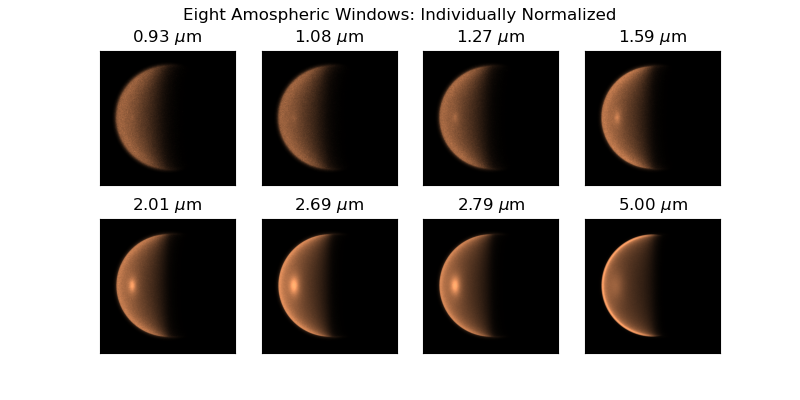

In [35]:
#ALERT: THIS CELL IS NOT INDEPENDENT, IT REQURIES THE PREVIOUS ONE TO BE RUN!

#Now that it's read in, we can make the display.

fig, axs = plt.subplots(2,4,figsize = (8,4)) 

cmap = "copper"

axs[0,0].imshow(temp[0], cmap=cmap) 
axs[0,0].set(xticks=[], yticks=[], title = '0.93 $\mu$m') 
axs[0,1].imshow(temp[1], cmap=cmap) 
axs[0,1].set(xticks=[], yticks=[], title = '1.08 $\mu$m') 
axs[0,2].imshow(temp[2], cmap=cmap) 
axs[0,2].set(xticks=[], yticks=[], title = '1.27 $\mu$m') 
axs[0,3].imshow(temp[3], cmap=cmap) 
axs[0,3].set(xticks=[], yticks=[], title = '1.59 $\mu$m') 
axs[1,0].imshow(temp[4], cmap=cmap) 
axs[1,0].set(xticks=[], yticks=[], title = '2.01 $\mu$m') 
axs[1,1].imshow(temp[5], cmap=cmap) 
axs[1,1].set(xticks=[], yticks=[], title = '2.69 $\mu$m') 
axs[1,2].imshow(temp[6], cmap=cmap) 
axs[1,2].set(xticks=[], yticks=[], title = '2.79 $\mu$m') 
axs[1,3].imshow(temp[7], cmap=cmap) 
axs[1,3].set(xticks=[], yticks=[], title = '5.00 $\mu$m') 

fig.suptitle("Eight Amospheric Windows: Individually Normalized")

plt.savefig("8WindowsNorm.pdf", format="pdf", bbox_inches='tight')

plt.show()


<IPython.core.display.Javascript object>


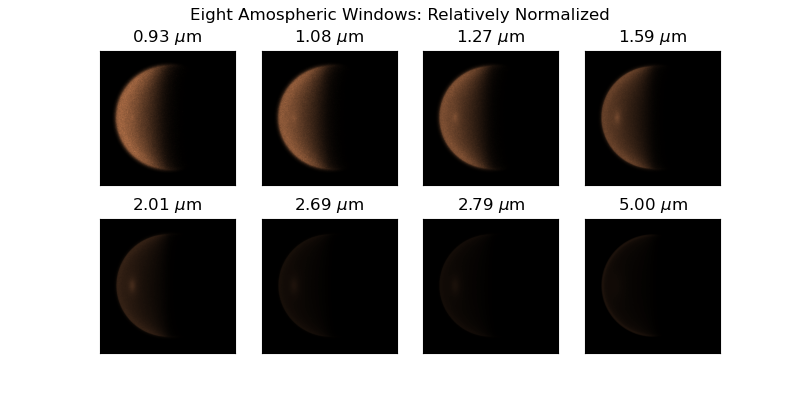

0.485922


In [47]:
#ALERT: THIS CELL IS NOT INDEPENDENT, IT REQURIES THE CELL TWO CELLS BACK TO BE RUN!

#Now that it's read in, we can make the display.

fig, axs = plt.subplots(2,4,figsize = (8,4)) 

cmap = "copper"
maximum = np.amax(temp)
print(maximum)

axs[0,0].imshow(temp[0]/maximum, cmap=cmap, vmax=1) 
axs[0,0].set(xticks=[], yticks=[], title = '0.93 $\mu$m') 
axs[0,1].imshow(temp[1]/maximum, cmap=cmap, vmax=1) 
axs[0,1].set(xticks=[], yticks=[], title = '1.08 $\mu$m') 
axs[0,2].imshow(temp[2]/maximum, cmap=cmap, vmax=1) 
axs[0,2].set(xticks=[], yticks=[], title = '1.27 $\mu$m') 
axs[0,3].imshow(temp[3]/maximum, cmap=cmap, vmax=1) 
axs[0,3].set(xticks=[], yticks=[], title = '1.59 $\mu$m') 
axs[1,0].imshow(temp[4]/maximum, cmap=cmap, vmax=1) 
axs[1,0].set(xticks=[], yticks=[], title = '2.01 $\mu$m') 
axs[1,1].imshow(temp[5]/maximum, cmap=cmap, vmax=1) 
axs[1,1].set(xticks=[], yticks=[], title = '2.69 $\mu$m') 
axs[1,2].imshow(temp[6]/maximum, cmap=cmap, vmax=1) 
axs[1,2].set(xticks=[], yticks=[], title = '2.79 $\mu$m') 
axs[1,3].imshow(temp[7]/maximum, cmap=cmap, vmax=1) 
axs[1,3].set(xticks=[], yticks=[], title = '5.00 $\mu$m') 

fig.suptitle("Eight Amospheric Windows: Relatively Normalized")

plt.savefig("8WindowsNoNorm.pdf", format="pdf", bbox_inches='tight')

plt.show()

We now need specular - lambertian information for all possible vieweing angles. Which is going to be a rather large endeavor to produce, hooooooboi. 

<IPython.core.display.Javascript object>


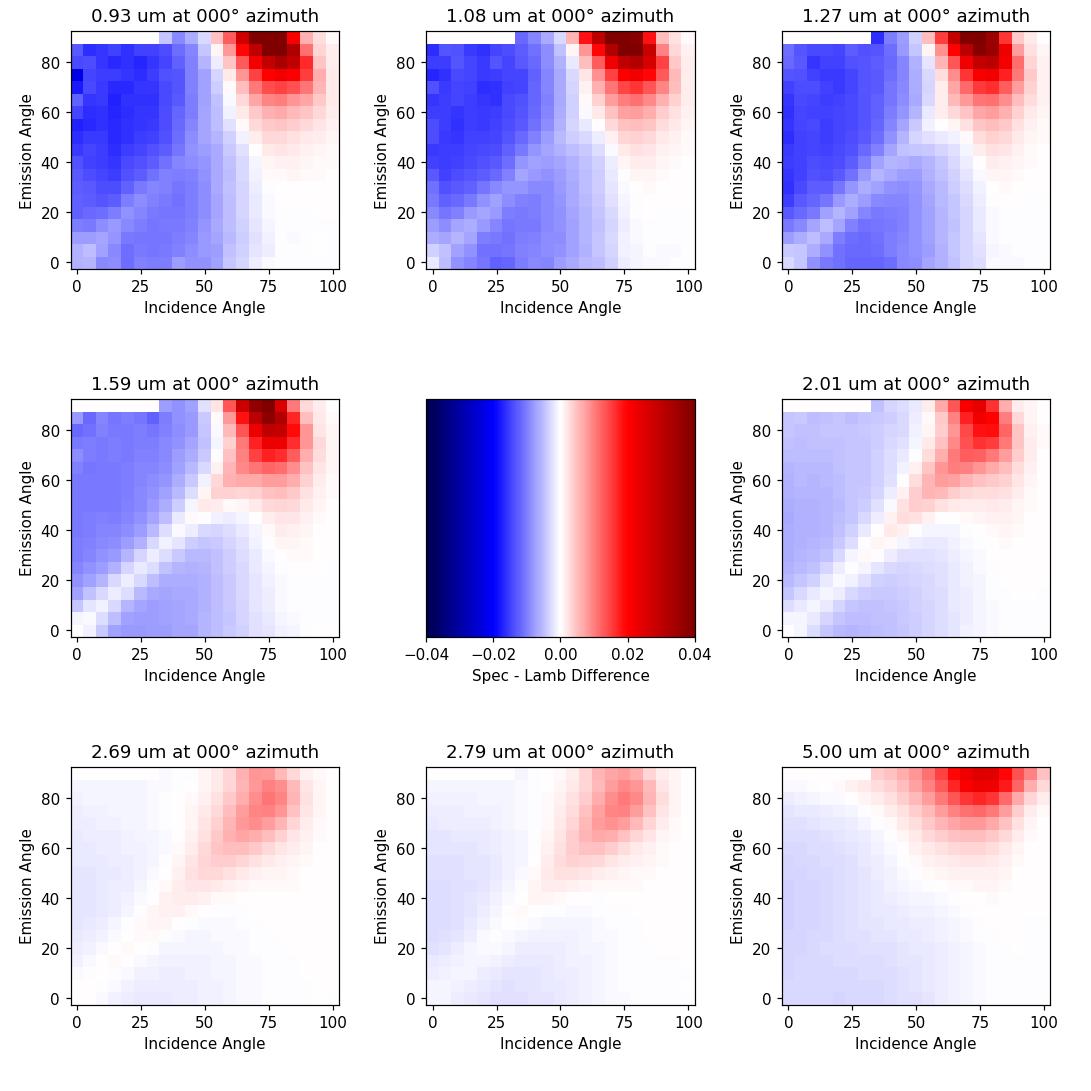

In [33]:
X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_DIFF_0.93w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.08w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.27w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.59w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.01w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.69w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.79w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_5.00w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 0.04
cmap = 'seismic'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
cax = axs[1,1]
#fig.colorbar(c4, ax=cax, label='Difference') 
norm = mpl.colors.Normalize(vmin=-scale, vmax=scale)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
             cax=axs[1,1], orientation="horizontal", label = "Spec - Lamb Difference")
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 10)
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

zz1 = np.zeros((Y, X))
zz2 = np.zeros((Y, X))
zz3 = np.zeros((Y, X))
zz4 = np.zeros((Y, X))
zz5 = np.zeros((Y, X))
zz6 = np.zeros((Y, X))
zz7 = np.zeros((Y, X))
zz8 = np.zeros((Y, X))
for x in range(X):
    for y in range(Y):
        zz1[y][x] = dataStorage1[x][y][0]
        zz2[y][x] = dataStorage2[x][y][0]
        zz3[y][x] = dataStorage3[x][y][0]
        zz4[y][x] = dataStorage4[x][y][0]
        zz5[y][x] = dataStorage5[x][y][0]
        zz6[y][x] = dataStorage6[x][y][0]
        zz7[y][x] = dataStorage7[x][y][0]
        zz8[y][x] = dataStorage8[x][y][0]
azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=-scale, vmax=scale)
azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=-scale, vmax=scale)
azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=-scale, vmax=scale)
azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=-scale, vmax=scale)
azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=-scale, vmax=scale)
azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=-scale, vmax=scale)
azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=-scale, vmax=scale)
azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=-scale, vmax=scale)

axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 um at '+angles[0]+ '° azimuth')
axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 um at '+angles[0]+ '° azimuth')
axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 um at '+angles[0]+ '° azimuth')
axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 um at '+angles[0]+ '° azimuth')
axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 um at '+angles[0]+ '° azimuth')
axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 um at '+angles[0]+ '° azimuth')
axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 um at '+angles[0]+ '° azimuth')
axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 um at '+angles[0]+ '° azimuth')

plt.savefig("SpecLamDiff.pdf", format="pdf", bbox_inches='tight')

plt.show()





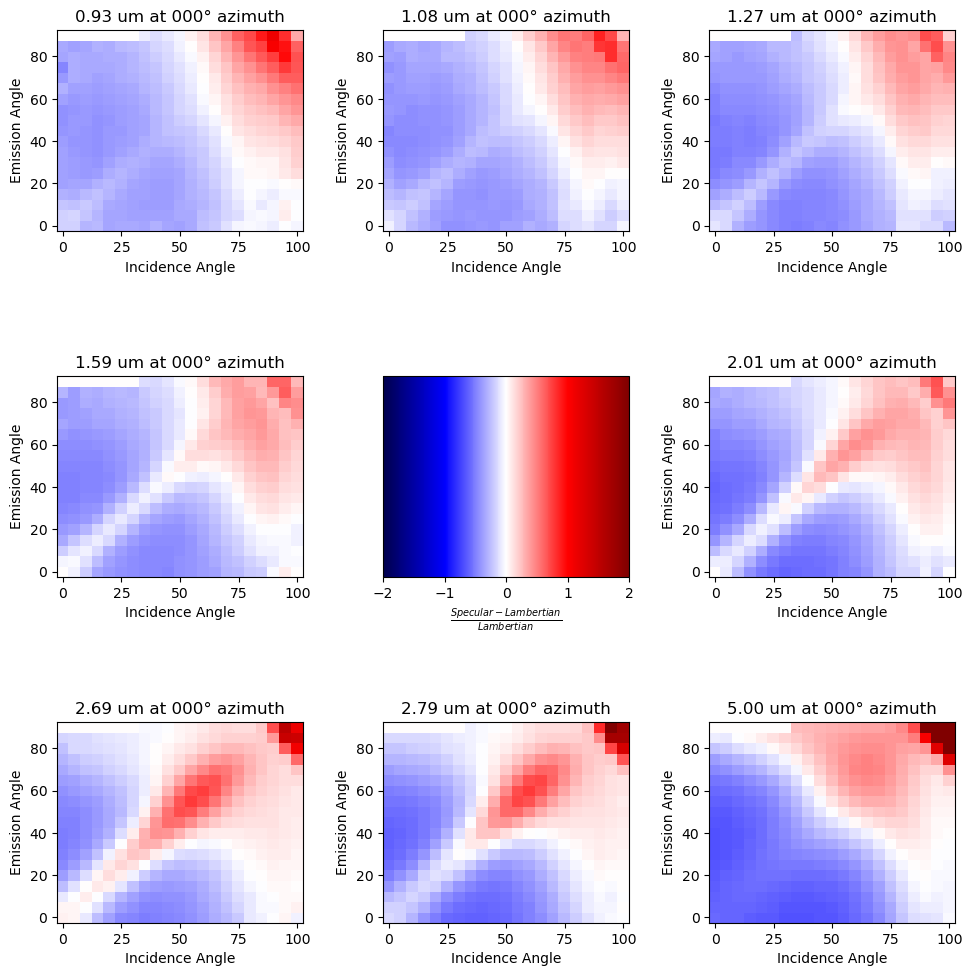

In [14]:
X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_NormDiff_0.93w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.08w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.27w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.59w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.01w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.69w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.79w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_5.00w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 2
cmap = 'seismic'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
cax = axs[1,1]
#fig.colorbar(c4, ax=cax, label='Difference') 
norm = mpl.colors.Normalize(vmin=-scale, vmax=scale)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
             cax=axs[1,1], orientation="horizontal", label="$\\frac{Specular - Lambertian}{Lambertian}$")
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 10)
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

zz1 = np.zeros((Y, X))
zz2 = np.zeros((Y, X))
zz3 = np.zeros((Y, X))
zz4 = np.zeros((Y, X))
zz5 = np.zeros((Y, X))
zz6 = np.zeros((Y, X))
zz7 = np.zeros((Y, X))
zz8 = np.zeros((Y, X))
for x in range(X):
    for y in range(Y):
        zz1[y][x] = dataStorage1[x][y][0]
        zz2[y][x] = dataStorage2[x][y][0]
        zz3[y][x] = dataStorage3[x][y][0]
        zz4[y][x] = dataStorage4[x][y][0]
        zz5[y][x] = dataStorage5[x][y][0]
        zz6[y][x] = dataStorage6[x][y][0]
        zz7[y][x] = dataStorage7[x][y][0]
        zz8[y][x] = dataStorage8[x][y][0]
azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=-scale, vmax=scale)
azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=-scale, vmax=scale)
azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=-scale, vmax=scale)
azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=-scale, vmax=scale)
azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=-scale, vmax=scale)
azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=-scale, vmax=scale)
azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=-scale, vmax=scale)
azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=-scale, vmax=scale)

axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 um at '+angles[0]+ '° azimuth')
axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 um at '+angles[0]+ '° azimuth')
axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 um at '+angles[0]+ '° azimuth')
axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 um at '+angles[0]+ '° azimuth')
axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 um at '+angles[0]+ '° azimuth')
axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 um at '+angles[0]+ '° azimuth')
axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 um at '+angles[0]+ '° azimuth')
axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 um at '+angles[0]+ '° azimuth')

plt.savefig("SpecLambNormDiff.pdf", format="pdf", bbox_inches='tight')

plt.show()





<IPython.core.display.Javascript object>


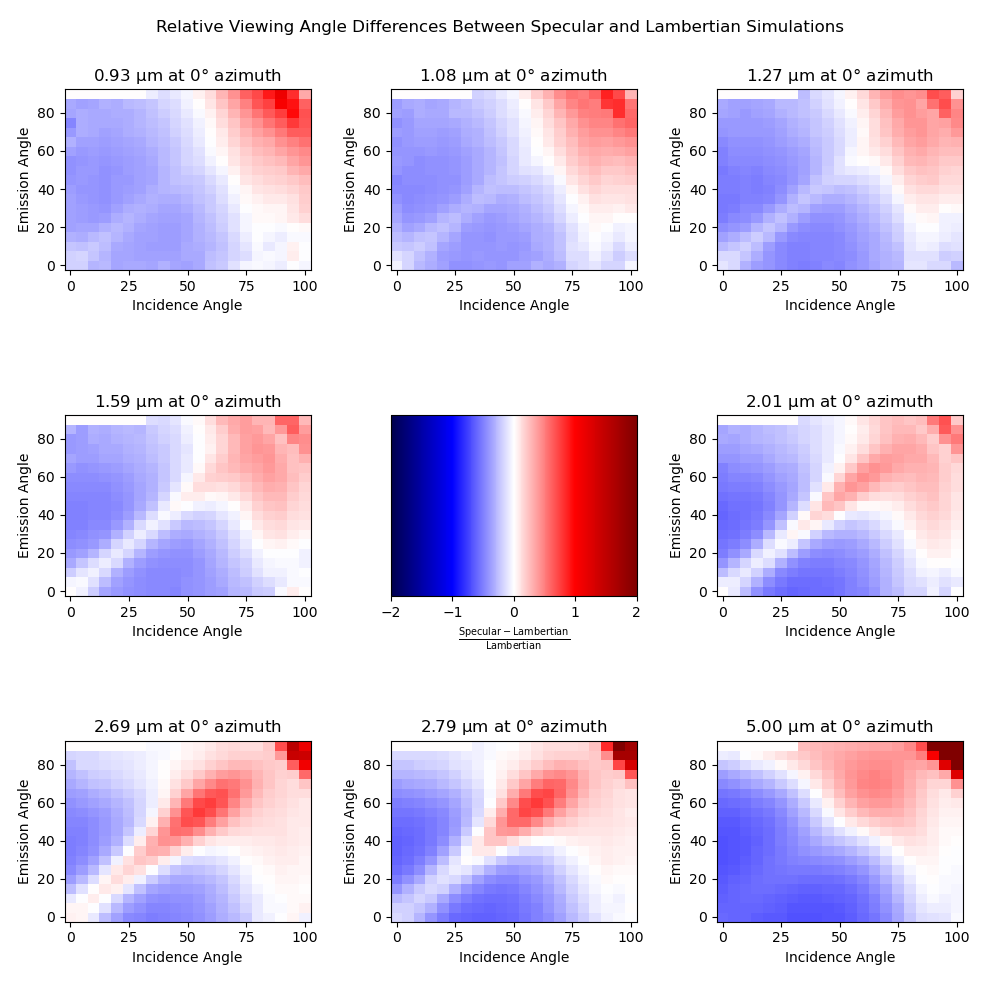

In [42]:
X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_NormDiff_0.93w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.08w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.27w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.59w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.01w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.69w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.79w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_5.00w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...
plt.suptitle("Relative Viewing Angle Differences Between Specular and Lambertian Simulations")

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 2
cmap = 'seismic'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
cax = axs[1,1]
#fig.colorbar(c4, ax=cax, label='Difference') 
norm = mpl.colors.Normalize(vmin=-scale, vmax=scale)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
             cax=axs[1,1], orientation="horizontal", label=r"$\frac{\mathrm{Specular - Lambertian}}{\mathrm{Lambertian}}$")
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 10)
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

zz1 = np.zeros((Y, X))
zz2 = np.zeros((Y, X))
zz3 = np.zeros((Y, X))
zz4 = np.zeros((Y, X))
zz5 = np.zeros((Y, X))
zz6 = np.zeros((Y, X))
zz7 = np.zeros((Y, X))
zz8 = np.zeros((Y, X))
for x in range(X):
    for y in range(Y):
        zz1[y][x] = dataStorage1[x][y][0]
        zz2[y][x] = dataStorage2[x][y][0]
        zz3[y][x] = dataStorage3[x][y][0]
        zz4[y][x] = dataStorage4[x][y][0]
        zz5[y][x] = dataStorage5[x][y][0]
        zz6[y][x] = dataStorage6[x][y][0]
        zz7[y][x] = dataStorage7[x][y][0]
        zz8[y][x] = dataStorage8[x][y][0]
azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=-scale, vmax=scale)
azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=-scale, vmax=scale)
azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=-scale, vmax=scale)
azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=-scale, vmax=scale)
azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=-scale, vmax=scale)
azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=-scale, vmax=scale)
azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=-scale, vmax=scale)
azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=-scale, vmax=scale)

axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 $\\mathrm{\\mu}$m at 0° azimuth')
axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 $\\mathrm{\\mu}$m at 0° azimuth')
axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 $\\mathrm{\\mu}$m at 0° azimuth')
axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 $\\mathrm{\\mu}$m at 0° azimuth')
axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 $\\mathrm{\\mu}$m at 0° azimuth')
axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 $\\mathrm{\\mu}$m at 0° azimuth')
axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 $\\mathrm{\\mu}$m at 0° azimuth')
axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 $\\mathrm{\\mu}$m at 0° azimuth')

plt.savefig("SpecLambNormDiffHeadOn.pdf", format="pdf", bbox_inches='tight')

plt.show()





<IPython.core.display.Javascript object>


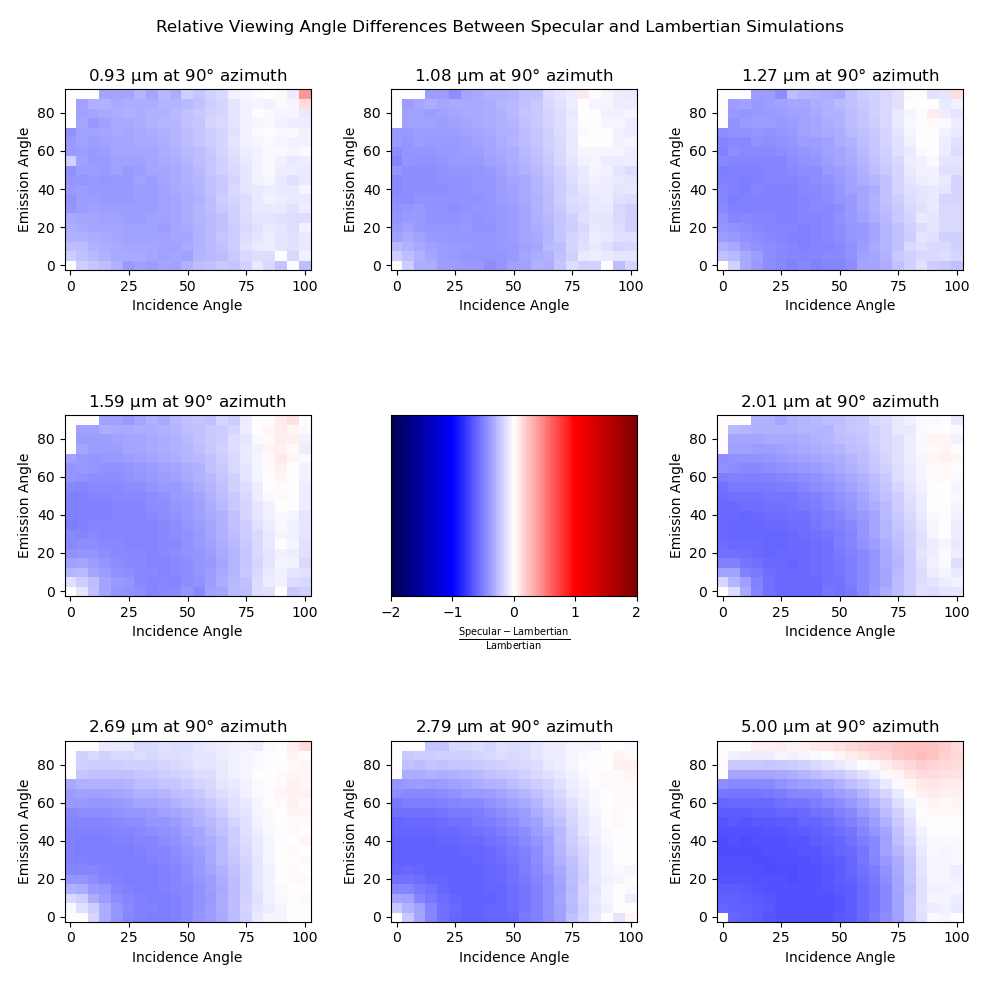

In [41]:
X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_NormDiff_0.93w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.08w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.27w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.59w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.01w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.69w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.79w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_5.00w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...
plt.suptitle("Relative Viewing Angle Differences Between Specular and Lambertian Simulations")

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 2
cmap = 'seismic'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
cax = axs[1,1]
#fig.colorbar(c4, ax=cax, label='Difference') 
norm = mpl.colors.Normalize(vmin=-scale, vmax=scale)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
             cax=axs[1,1], orientation="horizontal", label=r"$\frac{\mathrm{Specular - Lambertian}}{\mathrm{Lambertian}}$")
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 10)
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

zz1 = np.zeros((Y, X))
zz2 = np.zeros((Y, X))
zz3 = np.zeros((Y, X))
zz4 = np.zeros((Y, X))
zz5 = np.zeros((Y, X))
zz6 = np.zeros((Y, X))
zz7 = np.zeros((Y, X))
zz8 = np.zeros((Y, X))
for x in range(X):
    for y in range(Y):
        zz1[y][x] = dataStorage1[x][y][18]
        zz2[y][x] = dataStorage2[x][y][18]
        zz3[y][x] = dataStorage3[x][y][18]
        zz4[y][x] = dataStorage4[x][y][18]
        zz5[y][x] = dataStorage5[x][y][18]
        zz6[y][x] = dataStorage6[x][y][18]
        zz7[y][x] = dataStorage7[x][y][18]
        zz8[y][x] = dataStorage8[x][y][18]
azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=-scale, vmax=scale)
azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=-scale, vmax=scale)
azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=-scale, vmax=scale)
azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=-scale, vmax=scale)
azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=-scale, vmax=scale)
azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=-scale, vmax=scale)
azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=-scale, vmax=scale)
azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=-scale, vmax=scale)

axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 $\\mathrm{\\mu}$m at 90° azimuth')
axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 $\\mathrm{\\mu}$m at 90° azimuth')
axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 $\\mathrm{\\mu}$m at 90° azimuth')
axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 $\\mathrm{\\mu}$m at 90° azimuth')
axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 $\\mathrm{\\mu}$m at 90° azimuth')
axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 $\\mathrm{\\mu}$m at 90° azimuth')
axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 $\\mathrm{\\mu}$m at 90° azimuth')
axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 $\\mathrm{\\mu}$m at 90° azimuth')

plt.savefig("SpecLambNormDiffSideways.pdf", format="pdf", bbox_inches='tight')

plt.show()





<IPython.core.display.Javascript object>


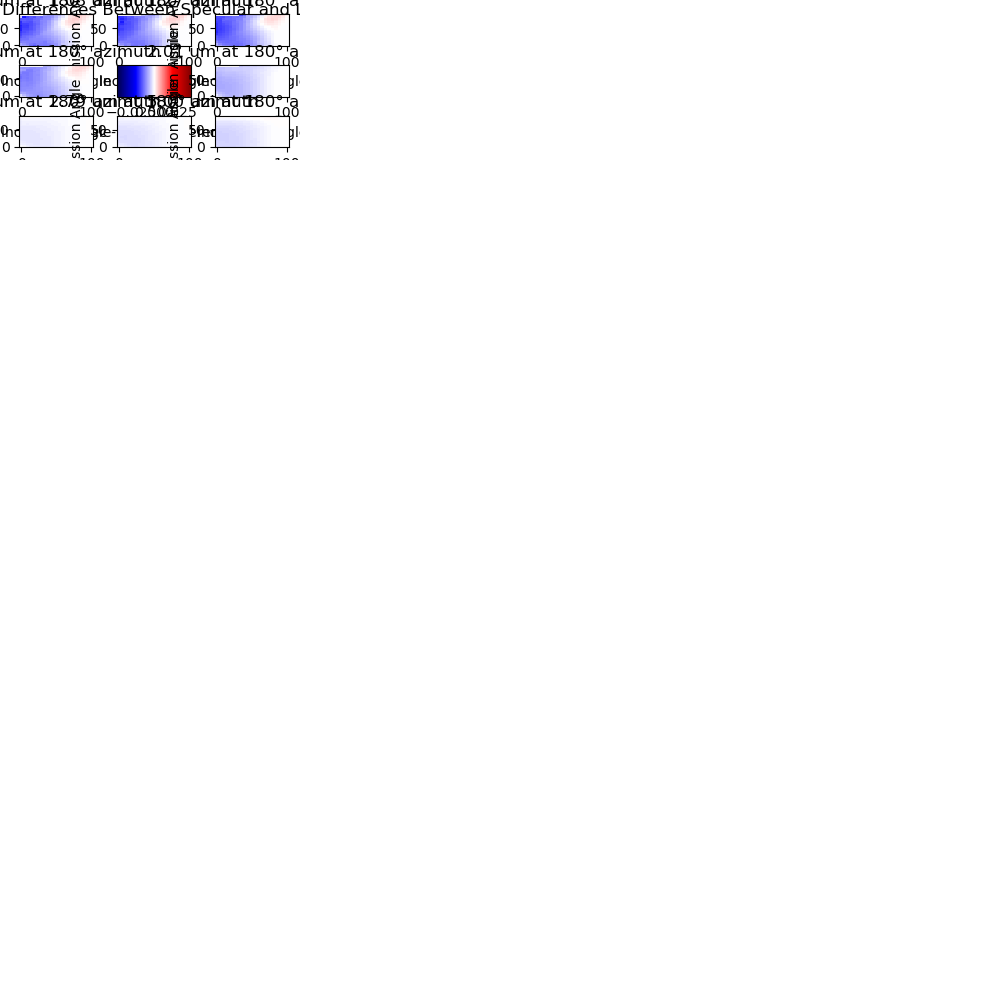

In [39]:
%matplotlib notebook
#THIS code is for plotting all plots at once!

# First we need to access the file. 
# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_DIFF_0.93w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.08w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.27w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_1.59w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.01w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.69w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_2.79w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_DIFF_5.00w.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 0.04
cmap = 'seismic'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
cax = axs[1,1]
#fig.colorbar(c4, ax=cax, label='Difference') 
norm = mpl.colors.Normalize(vmin=-scale, vmax=scale)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
             cax=axs[1,1], orientation="horizontal", label="Spec - Lamb Difference")
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 10)
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    axs[0,0].clear()
    axs[0,1].clear()
    axs[0,2].clear()
    axs[1,0].clear()
    axs[1,2].clear()
    axs[2,0].clear()
    axs[2,1].clear()
    axs[2,2].clear()
    zz1 = np.zeros((Y, X))
    zz2 = np.zeros((Y, X))
    zz3 = np.zeros((Y, X))
    zz4 = np.zeros((Y, X))
    zz5 = np.zeros((Y, X))
    zz6 = np.zeros((Y, X))
    zz7 = np.zeros((Y, X))
    zz8 = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz1[y][x] = dataStorage1[x][y][frame]
            zz2[y][x] = dataStorage2[x][y][frame]
            zz3[y][x] = dataStorage3[x][y][frame]
            zz4[y][x] = dataStorage4[x][y][frame]
            zz5[y][x] = dataStorage5[x][y][frame]
            zz6[y][x] = dataStorage6[x][y][frame]
            zz7[y][x] = dataStorage7[x][y][frame]
            zz8[y][x] = dataStorage8[x][y][frame]
    azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=-scale, vmax=scale)
    axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 um at '+angles[frame]+ '° azimuth')
    axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 um at '+angles[frame]+ '° azimuth')
    axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 um at '+angles[frame]+ '° azimuth')
    axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 um at '+angles[frame]+ '° azimuth')
    axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 um at '+angles[frame]+ '° azimuth')
    axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 um at '+angles[frame]+ '° azimuth')
    axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 um at '+angles[frame]+ '° azimuth')
    axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 um at '+angles[frame]+ '° azimuth')
    
ani = animation.FuncAnimation(fig, update, frames=Z, interval=100)

# To save the animation as an mp4
writer = animation.FFMpegFileWriter(fps = 2)
ani.save('ObservationGeometriesDifference.mp4', writer = writer)
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()





<IPython.core.display.Javascript object>


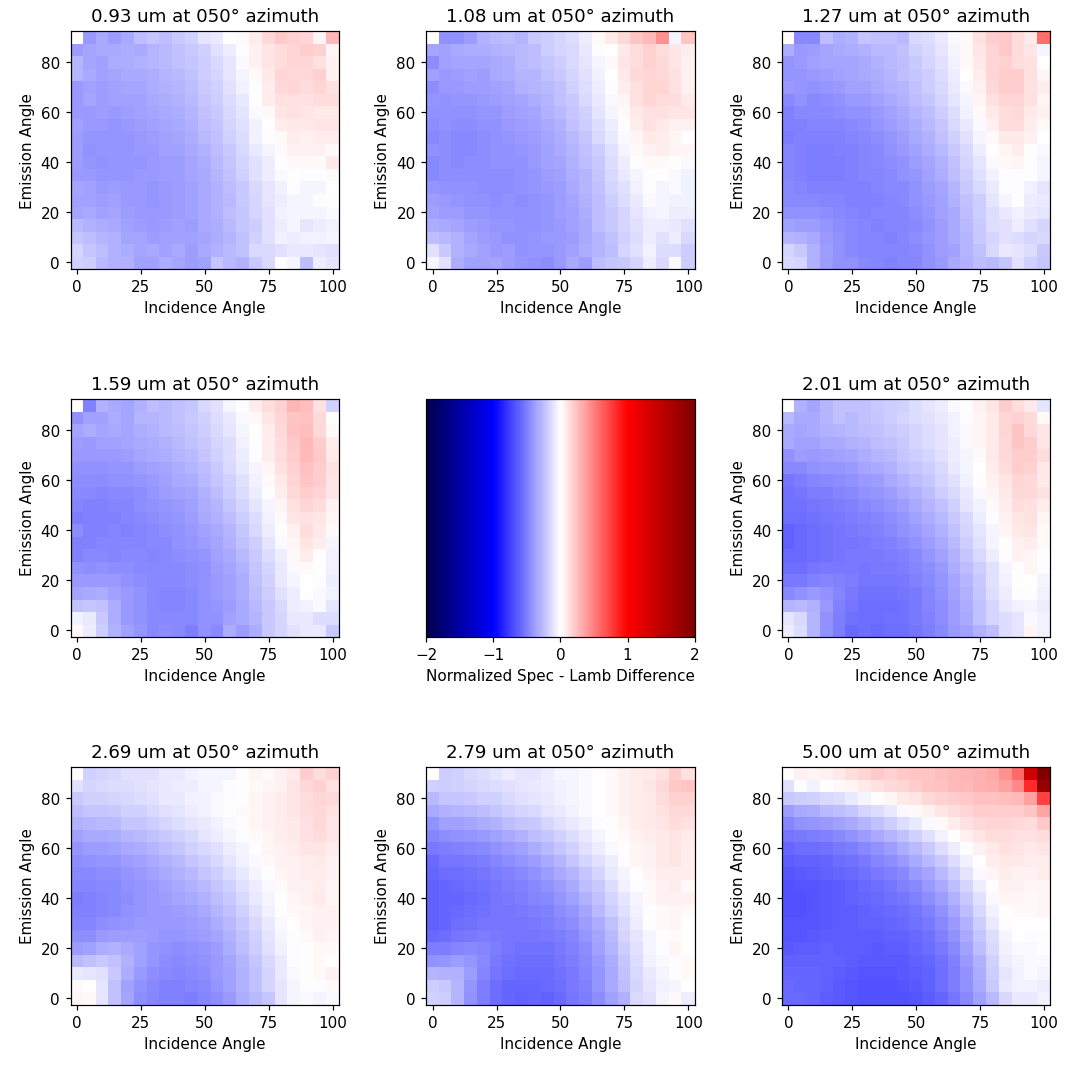

In [38]:
%matplotlib notebook
#THIS code is for plotting all plots at once!

# First we need to access the file. 
# Skeleton code nabbed from https://realpython.com/python-csv/

import csv
import math

X = 21
Y = 19
Z = 37

dataStorage1 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage2 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage3 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage4 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage5 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage6 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage7 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)] 
dataStorage8 = [[[0 for x in range(Z)] for x in range(Y)] for x in range(X)]

with open('iephi_consolidate_NormDiff_0.93w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage1[i][j][k] = float(row[i])
            if (math.isnan(dataStorage1[i][j][k])):
                dataStorage1[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.08w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage2[i][j][k] = float(row[i])
            if (math.isnan(dataStorage2[i][j][k])):
                dataStorage2[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.27w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage3[i][j][k] = float(row[i])
            if (math.isnan(dataStorage3[i][j][k])):
                dataStorage3[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_1.59w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage4[i][j][k] = float(row[i])
            if (math.isnan(dataStorage4[i][j][k])):
                dataStorage4[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.01w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage5[i][j][k] = float(row[i])
            if (math.isnan(dataStorage5[i][j][k])):
                dataStorage5[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.69w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage6[i][j][k] = float(row[i])
            if (math.isnan(dataStorage6[i][j][k])):
                dataStorage6[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_2.79w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage7[i][j][k] = float(row[i])
            if (math.isnan(dataStorage7[i][j][k])):
                dataStorage7[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
with open('iephi_consolidate_NormDiff_5.00w.Jcube.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j, k = 0, 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage8[i][j][k] = float(row[i])
            if (math.isnan(dataStorage8[i][j][k])):
                dataStorage8[i][j][k] = 0
            i = i + 1
        i = 0
        j = j + 1
        if (j >= Y):
            j = 0
            k = k + 1
        line_count += 1
#All the above does is read the data from the file and put it in a multidimensional array. 
#First coordinate is incidence angle, then emission, then azimuth. The values are intensity in... some units. 
#Now we just need to plot a slice in colors.

# https://matplotlib.org/stable/gallery/images_contours_and_fields/pcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-pcolor-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig, axs = plt.subplots(3,3) #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
scale = 2
cmap = 'seismic'

c1 = axs[0,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c2 = axs[0,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c3 = axs[0,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c4 = axs[1,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c5 = axs[1,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c6 = axs[2,0].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c7 = axs[2,1].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
c8 = axs[2,2].pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap, vmin=-scale, vmax=scale)
cax = axs[1,1]
#fig.colorbar(c4, ax=cax, label='Difference') 
norm = mpl.colors.Normalize(vmin=-scale, vmax=scale)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
             cax=axs[1,1], orientation="horizontal", label="Normalized Spec - Lamb Difference")
fig.tight_layout(pad=1.0)
fig.set_size_inches(10, 10)
#fig.suptitle("Specular Minus Lambertian")

# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    axs[0,0].clear()
    axs[0,1].clear()
    axs[0,2].clear()
    axs[1,0].clear()
    axs[1,2].clear()
    axs[2,0].clear()
    axs[2,1].clear()
    axs[2,2].clear()
    zz1 = np.zeros((Y, X))
    zz2 = np.zeros((Y, X))
    zz3 = np.zeros((Y, X))
    zz4 = np.zeros((Y, X))
    zz5 = np.zeros((Y, X))
    zz6 = np.zeros((Y, X))
    zz7 = np.zeros((Y, X))
    zz8 = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz1[y][x] = dataStorage1[x][y][frame]
            zz2[y][x] = dataStorage2[x][y][frame]
            zz3[y][x] = dataStorage3[x][y][frame]
            zz4[y][x] = dataStorage4[x][y][frame]
            zz5[y][x] = dataStorage5[x][y][frame]
            zz6[y][x] = dataStorage6[x][y][frame]
            zz7[y][x] = dataStorage7[x][y][frame]
            zz8[y][x] = dataStorage8[x][y][frame]
    azimuth1 = axs[0,0].pcolor(xx, yy, zz1, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth2 = axs[0,1].pcolor(xx, yy, zz2, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth3 = axs[0,2].pcolor(xx, yy, zz3, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth4 = axs[1,0].pcolor(xx, yy, zz4, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth5 = axs[1,2].pcolor(xx, yy, zz5, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth6 = axs[2,0].pcolor(xx, yy, zz6, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth7 = axs[2,1].pcolor(xx, yy, zz7, cmap=cmap, vmin=-scale, vmax=scale)
    azimuth8 = axs[2,2].pcolor(xx, yy, zz8, cmap=cmap, vmin=-scale, vmax=scale)
    axs[0,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '0.93 um at '+angles[frame]+ '° azimuth')
    axs[0,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.08 um at '+angles[frame]+ '° azimuth')
    axs[0,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.27 um at '+angles[frame]+ '° azimuth')
    axs[1,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '1.59 um at '+angles[frame]+ '° azimuth')
    axs[1,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.01 um at '+angles[frame]+ '° azimuth')
    axs[2,0].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.69 um at '+angles[frame]+ '° azimuth')
    axs[2,1].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '2.79 um at '+angles[frame]+ '° azimuth')
    axs[2,2].set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = '5.00 um at '+angles[frame]+ '° azimuth')
    
ani = animation.FuncAnimation(fig, update, frames=Z, interval=100)

# To save the animation as an mp4
writer = animation.FFMpegFileWriter(fps = 2)
ani.save('ObservationGeometriesNormalizedDifference.mp4', writer = writer)
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()





Now let's make a plot of the Tamasko wavefunctions for the methane windows.

<IPython.core.display.Javascript object>


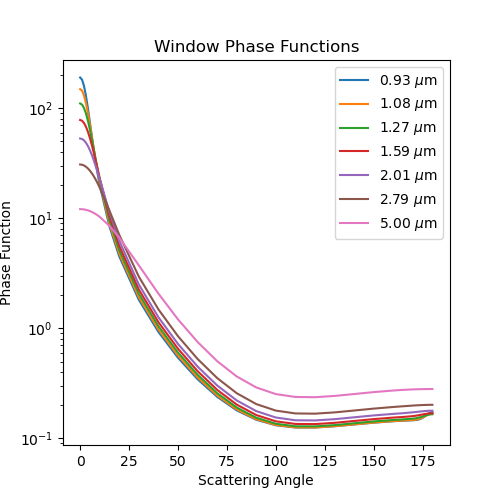

In [75]:
X = 19
Y = 40

dataStorage = [[0 for x in range(Y)] for x in range(X)]


#The above holds the data of the cube itself. 

with open("PhaseFuncSheet.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    i, j = 0, 0
    for row in csv_reader:
        while (i < X):
            dataStorage[i][j] = float(row[i])
            i = i + 1
        i = 0
        j = j + 1
        line_count += 1

fig, ax = plt.subplots(figsize = (5,5)) 

ax.plot(dataStorage[0][1:],dataStorage[7][1:],label="0.93 $\mu$m")
ax.plot(dataStorage[0][1:],dataStorage[8][1:],label="1.08 $\mu$m")
ax.plot(dataStorage[0][1:],dataStorage[9][1:],label="1.27 $\mu$m")
ax.plot(dataStorage[0][1:],dataStorage[10][1:],label="1.59 $\mu$m")
ax.plot(dataStorage[0][1:],dataStorage[11][1:],label="2.01 $\mu$m")
ax.plot(dataStorage[0][1:],dataStorage[13][1:],label="2.79 $\mu$m")
ax.plot(dataStorage[0][1:],dataStorage[18][1:],label="5.00 $\mu$m")
ax.set(title = 'Window Phase Functions', yscale = "log", xlabel = "Scattering Angle", ylabel = "Phase Function") 
ax.legend()

plt.savefig("WindowPhaseFunctions.pdf", format="pdf")

plt.show()